# Setup

In [2]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras
from roboflow import Roboflow

In [5]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [7]:
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("dataset-jerawat").project("capstone-bjc8v")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.31, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Capstone-8 in yolov8:: 100%|██████████| 1230/1230 [00:00<00:00, 2120.68it/s]


# 50-800

In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 227MB/s]
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Capstone-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1718270603.85805956df10.5323.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1240.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1241.jpg  weights
P_curve.png					    train_batch1242.jpg


/content


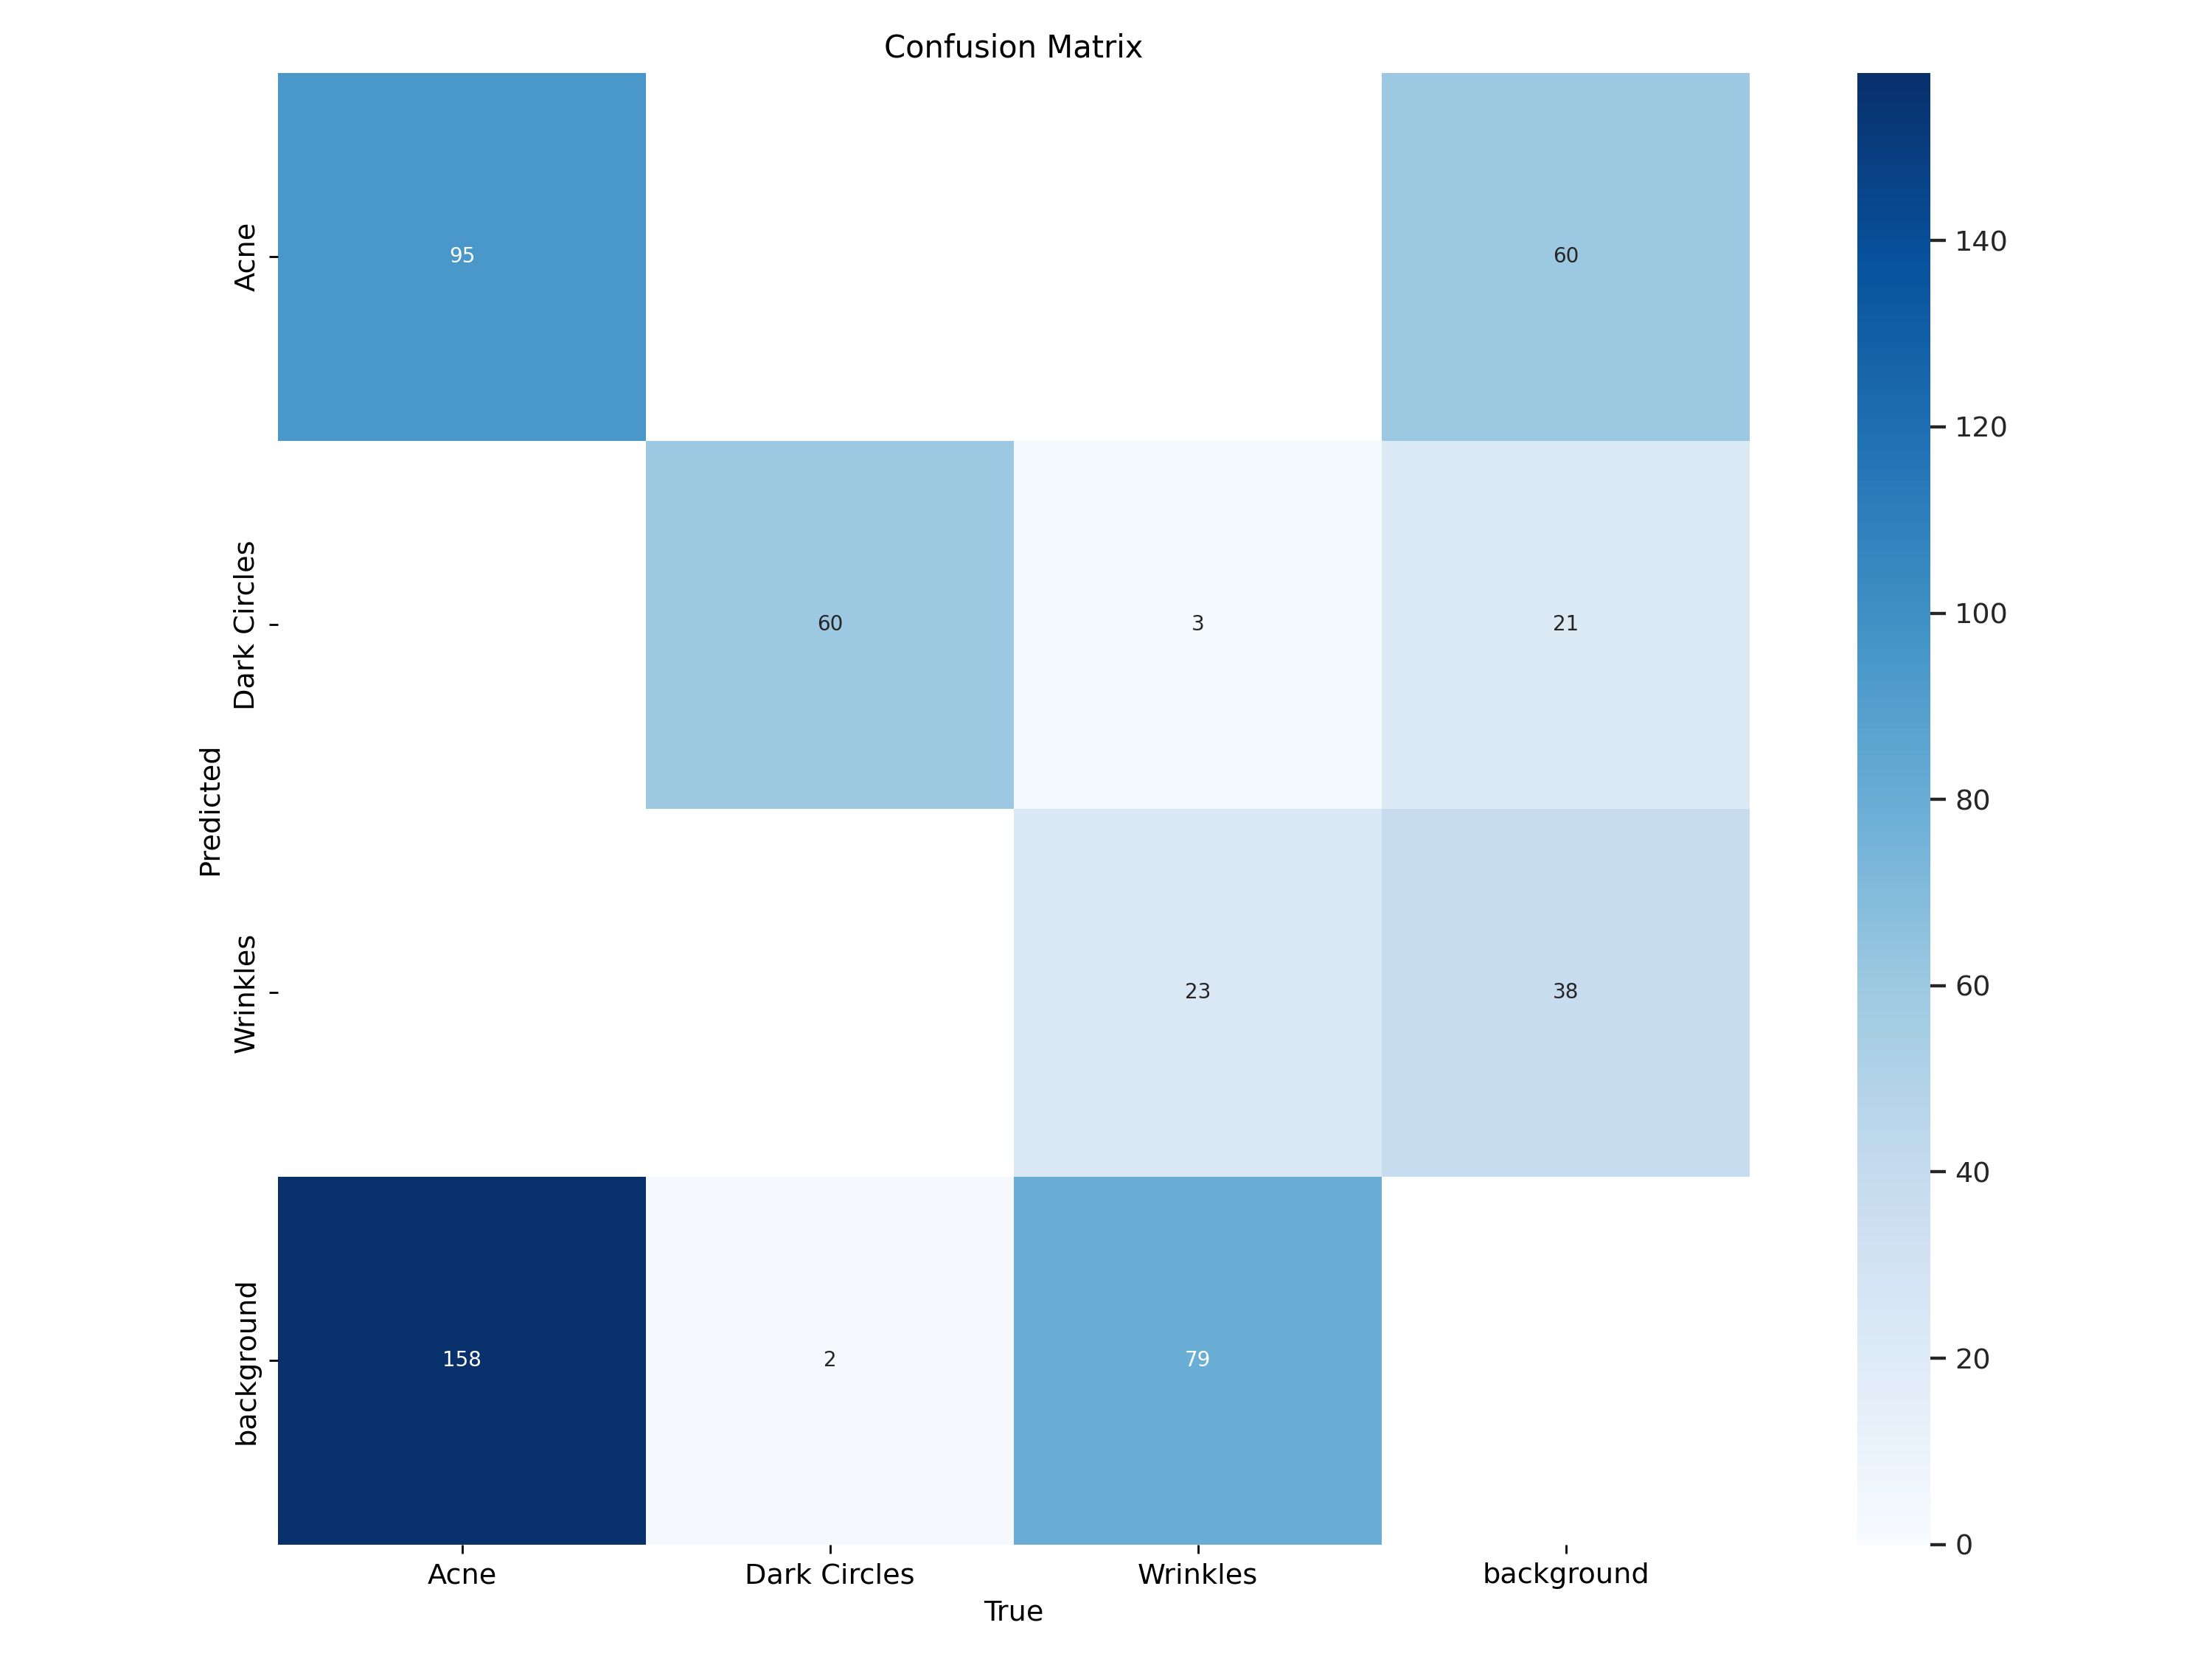

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [13]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Capstone-8/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 420. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:09<00:00,  2.48s/it]
                   all         61        420      0.486      0.488      0.475      0.168
                  Acne         18        253      0.558       0.37      0.404      0.132
          Dark Circles         36         62      0.617      0.903      0.872      0.323
              Wrinkles         

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/61 /content/datasets/Capstone-8/test/images/04833_png_jpg.rf.29ee5c80c5aec07ec6b828833b94d5e6.jpg: 1024x1024 4 Wrinkless, 32.5ms
image 2/61 /content/datasets/Capstone-8/test/images/05844_png_jpg.rf.19793b4118a36ad83fb754364ee46f1e.jpg: 1024x1024 7 Wrinkless, 32.5ms
image 3/61 /content/datasets/Capstone-8/test/images/06764_png_jpg.rf.cdf079a084fceccc93e279998e06fc9e.jpg: 1024x1024 2 Wrinkless, 32.5ms
image 4/61 /content/datasets/Capstone-8/test/images/105_jpg.rf.fdbb4425709236717e814e854d280150.jpg: 1024x1024 1 Acne, 1 Dark Circles, 32.6ms
image 5/61 /content/datasets/Capstone-8/test/images/106_jpg.rf.3159aec33b574297403c2aceeb01ebeb.jpg: 1024x1024 1 Acne, 2 Dark Circless, 32.5ms
image 6/61 /content/datasets/Capstone-8/test/images/107_jpg.rf.e0391272b1a3c328832ae8436d011eb7.jpg: 1024x1024 2 Acnes, 1 Dark

/content


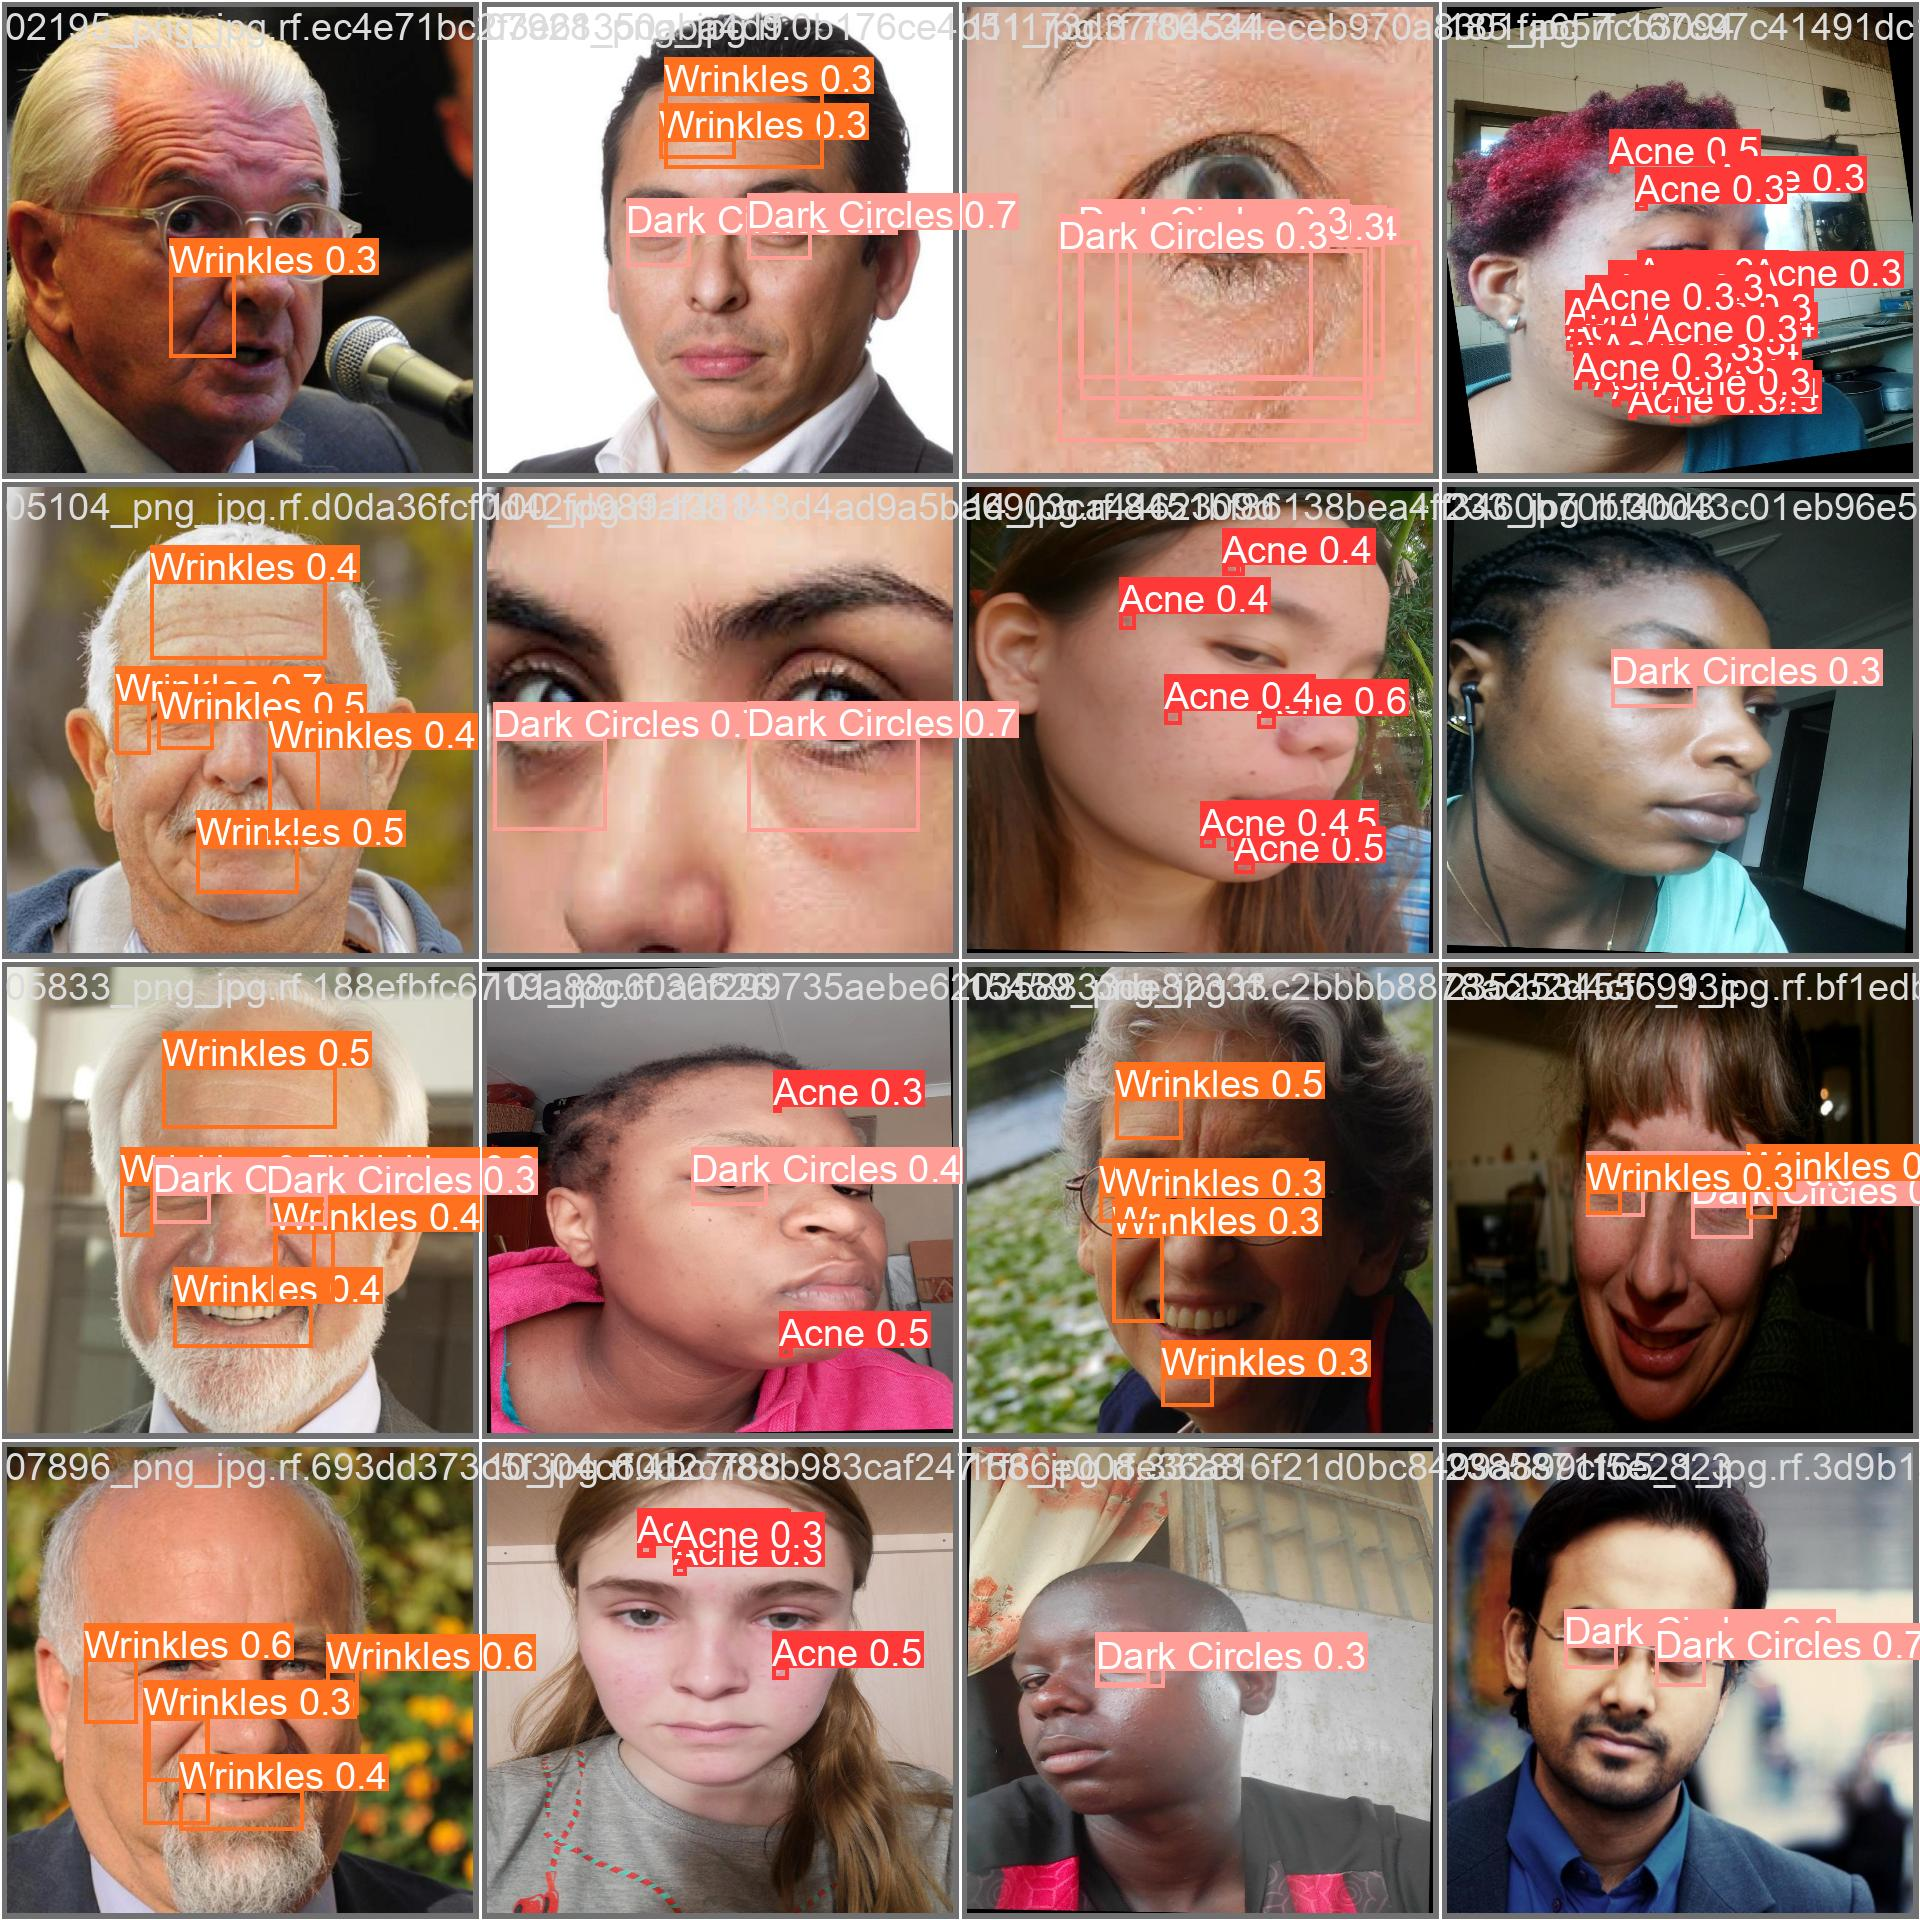

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Export

In [16]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/v8M4_50_1024.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'v8M4_50_1024.pt')
files.download('v8M4_50_1024.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>